In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import joblib

In [37]:
### Importacion de CSV ###
path = "Sales TEC_Valid.csv"
df_sales = pd.read_csv(path)
### Informacion de la tabla ###
df_sales.head(5)

,Flight_ID,ProductType,ProductName,Quantity,TotalSales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0


In [38]:
path = "Dataset_Viva.csv"
f_df_2023 = pd.read_csv(path)
f_df_2023 = f_df_2023.drop("Unnamed: 0", axis=1)
f_df_2023.head()

,Flight_Id,Aeronave,Departurestation,Arrivalstation,Destination_Type,Origin_Type,Std,Sta,Capacity,Passengers,...,September,Ciudad Fronteriza_O,Ciudad Principal_O,Ecoturismo_O,Mx Amigos Y Familia_O,Playa_O,Matutino,Nocturno,Vespertino,Rutas_Nuevas
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5


In [39]:
df_final = f_df_2023.merge(df_sales, left_on='Flight_Id', right_on='Flight_ID',
          suffixes=('_Flights', '_Sales'))
df_final.drop('Flight_ID', axis=1, inplace=True)
df_final

,Flight_Id,Aeronave,Departurestation,Arrivalstation,Destination_Type,Origin_Type,Std,Sta,Capacity,Passengers,...,Mx Amigos Y Familia_O,Playa_O,Matutino,Nocturno,Vespertino,Rutas_Nuevas,ProductType,ProductName,Quantity,TotalSales
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,1.0,0.0,1.0,0.0,0.0,5,Botanas,Doritos Nacho,1,49.0
1,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,1.0,0.0,1.0,0.0,0.0,5,Perecederos,Panini Clasico,2,230.0
2,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,1.0,0.0,1.0,0.0,0.0,5,Specials,Capitan Morning,1,-10.0
3,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,1.0,0.0,1.0,0.0,0.0,5,Licores,Jack And Coke,2,144.0
4,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,1.0,0.0,1.0,0.0,0.0,5,Specials,Combo Snack,1,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539776,1817515baa1e1c61d792d4551b4ac93b,XA-VAM,BG,BP,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-12-11 17:40:00,2023-12-11 19:10:00,180,142.0,...,1.0,0.0,0.0,0.0,1.0,206,Refrescos,Coca Cola Dieta,1,48.0
2539777,1817515baa1e1c61d792d4551b4ac93b,XA-VAM,BG,BP,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-12-11 17:40:00,2023-12-11 19:10:00,180,142.0,...,1.0,0.0,0.0,0.0,1.0,206,Refrescos,Fanta De Naranja,1,48.0
2539778,1817515baa1e1c61d792d4551b4ac93b,XA-VAM,BG,BP,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-12-11 17:40:00,2023-12-11 19:10:00,180,142.0,...,1.0,0.0,0.0,0.0,1.0,206,Specials,Licor + Refresco,1,-18.0
2539779,1817515baa1e1c61d792d4551b4ac93b,XA-VAM,BG,BP,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-12-11 17:40:00,2023-12-11 19:10:00,180,142.0,...,1.0,0.0,0.0,0.0,1.0,206,Botanas,Fritos Limon Y Sal,1,49.0


In [40]:
df_final.columns

Index(['Flight_Id', 'Aeronave', 'Departurestation', 'Arrivalstation',
       'Destination_Type', 'Origin_Type', 'Std', 'Sta', 'Capacity',
       'Passengers', 'Bookings', 'Rutas', 'Hora_Std', 'Hora_Sta', 'Dia_Std',
       'Dia_Sta', 'Ocupacion', 'Promedio De Pasajeros Por Booking',
       'Sobrevendido', 'Abastesimiento', 'Dia_Semana', 'Horario',
       'Tiempo_En_Minutos', 'Mes', 'Ciudad Fronteriza_D', 'Ciudad Principal_D',
       'Ecoturismo_D', 'Mx Amigos Y Familia_D', 'Playa_D', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Ciudad Fronteriza_O',
       'Ciudad Principal_O', 'Ecoturismo_O', 'Mx Amigos Y Familia_O',
       'Playa_O', 'Matutino', 'Nocturno', 'Vespertino', 'Rutas_Nuevas',
       'ProductType', 'ProductName', 'Quantity', 'TotalSales'],
      dtype='object')

In [30]:
df_final['ProductType'].unique()

array(['Botanas', 'Perecederos', 'Specials', 'Licores', 'Refrescos',
       'Bebidas Calientes', 'Galletas', 'OFERTAS ', 'Lacteos', 'Sopas',
       'COMBOS CREW', 'VivaTransfer', 'Hertz.', 'VIVA PLAY', 'Vivabus',
       'VIVA Taxis', 'Antros', 'Transportaciones CUN',
       'Alimentos Charter', 'Transportaciones MTY',
       'Transportaciones TLC'], dtype=object)

In [46]:
print("Shape: ", df_final.shape)
print(df_final['ProductType'].value_counts())

Shape:  (2539781, 61)
Botanas                 606481
Refrescos               574967
Specials                391976
Licores                 302397
Perecederos             181647
Galletas                143118
Bebidas Calientes       124689
Sopas                   115677
OFERTAS                  38609
Lacteos                  38128
Vivabus                   9863
Transportaciones CUN      3726
Hertz.                    2405
COMBOS CREW               1968
VIVA Taxis                1435
Transportaciones MTY      1215
VivaTransfer               419
Antros                     390
VIVA PLAY                  380
Transportaciones TLC       287
Alimentos Charter            4
Name: ProductType, dtype: int64


In [47]:
df_final = df_final.loc[df_final['ProductType'] == 'Perecederos']

In [48]:
df_final['ProductType'].unique()

array(['Perecederos'], dtype=object)

In [34]:
corr_matrix = df_final.corr()
corr_matrix['Quantity'].sort_values(ascending=False)

Quantity                             1.000000
TotalSales                           0.999309
Promedio De Pasajeros Por Booking    0.252119
Tiempo_En_Minutos                    0.236372
Playa_D                              0.192043
Capacity                             0.103166
Passengers                           0.098262
Matutino                             0.069259
Ciudad Fronteriza_D                  0.060409
Ciudad Fronteriza_O                  0.052738
Ocupacion                            0.040008
August                               0.038073
July                                 0.031866
June                                 0.012777
Playa_O                              0.012562
Friday                               0.012492
Thursday                             0.010548
Sobrevendido                         0.009351
Saturday                             0.004193
Tuesday                              0.003283
December                             0.001851
September                         

In [49]:
df_final = df_final[['Std', 'Dia_Std','Rutas_Nuevas','Tiempo_En_Minutos','Passengers', 'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D',
       'Ciudad Principal_D', 'Playa_D', 'August', 'Nocturno', 'Quantity', 'Ecoturismo_D', 'Ecoturismo_O', 'July', 'February', 'Matutino']]
print("Shape: ", df_final.shape)
df_final.head()

Shape:  (181647, 23)


,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,...,Ciudad Principal_D,Playa_D,August,Nocturno,Quantity,Ecoturismo_D,Ecoturismo_O,July,February,Matutino
1,2023-12-17 08:10:00,2023-12-17,5,70.0,141.0,0.5875,71.0,240,0,0.0,...,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,1.0
13,2023-12-17 08:10:00,2023-12-17,5,70.0,141.0,0.5875,71.0,240,0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
25,2023-02-12 15:10:00,2023-02-12,5,70.0,184.0,1.0000,109.0,180,1,0.0,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,0.0
33,2023-02-12 15:10:00,2023-02-12,5,70.0,184.0,1.0000,109.0,180,1,0.0,...,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0
46,2023-02-12 15:10:00,2023-02-12,5,70.0,184.0,1.0000,109.0,180,1,0.0,...,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,1.0,0.0


In [50]:
df_final = df_final.sort_values(by=['Std','Rutas_Nuevas'], ascending=[True, False])
df_final.reset_index(drop=True, inplace=True)
df_final.head()

,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,...,Ciudad Principal_D,Playa_D,August,Nocturno,Quantity,Ecoturismo_D,Ecoturismo_O,July,February,Matutino
0,2023-01-02 00:20:00,2023-01-02,235,300.0,120.0,0.645161,68.0,186,0,1.0,...,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0
1,2023-01-02 00:20:00,2023-01-02,235,300.0,120.0,0.645161,68.0,186,0,1.0,...,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0
2,2023-01-02 00:30:00,2023-01-02,238,330.0,170.0,0.913978,99.0,186,0,1.0,...,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0
3,2023-01-02 00:30:00,2023-01-02,238,330.0,170.0,0.913978,99.0,186,0,1.0,...,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0
4,2023-01-02 00:30:00,2023-01-02,238,330.0,170.0,0.913978,99.0,186,0,1.0,...,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.preprocessing import StandardScaler
#'cantidad de productos',
df_y = df_final[['Quantity']]

df_num = df_final[['Rutas_Nuevas','Tiempo_En_Minutos','Passengers', 'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D',
       'Ciudad Principal_D', 'Playa_D', 'August', 'Nocturno', 'Ecoturismo_D', 'Ecoturismo_O', 'July', 'February', 'Matutino']]

df_cat = df_final[['Std', 'Dia_Std']]

escalar = StandardScaler() #"z = (x - media) / std"

df_scaled = escalar.fit(df_num) # Compute the mean and std to be used for later scaling.
df_scaled = escalar.transform(df_num) # Fit to data, then transform it.

In [52]:
df_scaled = pd.DataFrame(df_scaled, columns = ['Rutas_Nuevas','Tiempo_En_Minutos','Passengers', 'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D',
       'Ciudad Principal_D', 'Playa_D', 'August', 'Nocturno', 'Ecoturismo_D', 'Ecoturismo_O', 'July', 'February', 'Matutino'])

df_y.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)

# Concatenar
df_prep = pd.concat([ df_y,df_cat, df_scaled], axis = 1)
df_prep.head(5)

,Quantity,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,...,Ciudad Fronteriza_D,Ciudad Principal_D,Playa_D,August,Nocturno,Ecoturismo_D,Ecoturismo_O,July,February,Matutino
0,1,2023-01-02 00:20:00,2023-01-02,1.546202,2.568473,-1.989502,-1.969431,-1.585824,-0.940109,-0.610995,...,-0.378688,-0.844358,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
1,1,2023-01-02 00:20:00,2023-01-02,1.546202,2.568473,-1.989502,-1.969431,-1.585824,-0.940109,-0.610995,...,-0.378688,-0.844358,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2,1,2023-01-02 00:30:00,2023-01-02,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,...,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
3,1,2023-01-02 00:30:00,2023-01-02,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,...,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
4,1,2023-01-02 00:30:00,2023-01-02,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,...,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329


In [53]:
df_prep.index = pd.to_datetime(df_prep['Std'], format='%Y-%m-%d %H:%M:%S')

df_prep = df_prep[['Rutas_Nuevas','Tiempo_En_Minutos','Passengers', 'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D',
       'Ciudad Principal_D', 'Playa_D', 'August', 'Nocturno', 'Ecoturismo_D', 'Ecoturismo_O', 'July', 'February', 'Matutino']]

print("Shape: ", df_prep.shape)
df_prep

Shape:  (181647, 20)


,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,Ciudad Principal_O,Mx Amigos Y Familia_D,Ciudad Fronteriza_D,Ciudad Principal_D,Playa_D,August,Nocturno,Ecoturismo_D,Ecoturismo_O,July,February,Matutino
Std,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:20:00,1.546202,2.568473,-1.989502,-1.969431,-1.585824,-0.940109,-0.610995,2.645144,-0.90418,2.341728,-0.378688,-0.844358,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-01-02 00:20:00,1.546202,2.568473,-1.989502,-1.969431,-1.585824,-0.940109,-0.610995,2.645144,-0.90418,2.341728,-0.378688,-0.844358,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-01-02 00:30:00,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,2.645144,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-01-02 00:30:00,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,2.645144,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-01-02 00:30:00,1.586365,3.036969,-0.546593,0.162697,-0.513877,-0.940109,-0.610995,2.645144,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:15:00,-1.184867,-0.711002,0.809741,0.736821,0.419754,0.391116,-0.610995,-0.378051,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-12-31 23:45:00,1.506039,2.490390,-0.604310,0.077412,-1.343772,-0.940109,-0.610995,2.645144,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329
2023-12-31 23:45:00,1.506039,2.490390,-0.604310,0.077412,-1.343772,-0.940109,-0.610995,2.645144,-0.90418,-0.427035,-0.378688,1.184332,-0.579997,-0.326081,3.633645,-0.235203,-0.224692,-0.331048,-0.261195,-0.994329


In [54]:
def df_to_X_y(df, df_y, window_size=30):
  df_as_np = df.to_numpy()
  df2_as_np = df_y.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df2_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [55]:
X, y = df_to_X_y(df_prep, df_y)
X.shape, y.shape

((181617, 30, 20), (181617,))

In [56]:
train_limit = round(len(X)*0.80)
valid_limit = round(len(X)*0.90)

X_train, y_train = X[:train_limit], y[:train_limit]
X_val, y_val = X[train_limit:valid_limit], y[train_limit:valid_limit]
X_test, y_test = X[valid_limit:], y[valid_limit:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((145294, 30, 20),
 (145294,),
 (18161, 30, 20),
 (18161,),
 (18162, 30, 20),
 (18162,))

In [57]:
from tensorflow.keras.layers import Bidirectional, Input

In [60]:
model = Sequential()
model.add(Input(shape = (X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 30, 128)           43520     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                        

Epoch 1/12
4844/4844 [==============================] - 192s 36ms/step - loss: 3.7451 - mae: 1.4050 - mse: 3.7451 - val_loss: 3.3133 - val_mae: 1.2934 - val_mse: 3.3133
Epoch 2/12
4844/4844 [==============================] - 181s 37ms/step - loss: 3.5099 - mae: 1.3635 - mse: 3.5099 - val_loss: 3.1675 - val_mae: 1.2723 - val_mse: 3.1675
Epoch 3/12
4844/4844 [==============================] - 177s 37ms/step - loss: 3.3982 - mae: 1.3425 - mse: 3.3982 - val_loss: 3.1792 - val_mae: 1.2767 - val_mse: 3.1792
Epoch 4/12
4844/4844 [==============================] - 177s 36ms/step - loss: 3.3399 - mae: 1.3311 - mse: 3.3399 - val_loss: 3.1592 - val_mae: 1.2613 - val_mse: 3.1592
Epoch 5/12
4844/4844 [==============================] - 177s 36ms/step - loss: 3.2887 - mae: 1.3205 - mse: 3.2887 - val_loss: 3.1285 - val_mae: 1.3054 - val_mse: 3.1285
Epoch 6/12
4844/4844 [==============================] - 178s 37ms/step - loss: 3.2482 - mae: 1.3130 - mse: 3.2482 - val_loss: 3.1975 - val_mae: 1.2842 - va

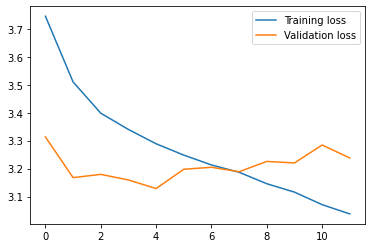

In [61]:
history = model.fit(X_train, y_train, epochs=12, batch_size=30, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [62]:
## Guardar el modelo
joblib.dump(model, "my_model_12_epochs_sales.pkl")

['my_model_12_epochs_sales.pkl']

In [63]:
model_loaded = joblib.load("my_model_12_epochs_sales.pkl")

In [64]:
predicciones_test = model_loaded.predict(X_test)
predicciones_test[:,0]

568/568 [==============================] - 8s 11ms/step


array([2.2119343, 3.570108 , 3.7058954, ..., 1.7082947, 1.7325858,
       1.7539308], dtype=float32)

In [65]:
y_test

array([1, 3, 2, ..., 3, 2, 1], dtype=int64)

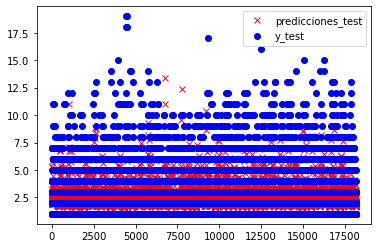

In [66]:
plt.plot(predicciones_test, "rx", label='predicciones_test')
plt.plot(y_test, "bo", label='y_test')
plt.legend()

In [70]:
n_future = 7

print(df_y.shape)
print(df_prep.shape)

(181647, 1)
(181647, 20)


In [71]:
predicciones_test_2 = model_loaded.predict(X_test)
a = pd.DataFrame(predicciones_test_2)

568/568 [==============================] - 8s 14ms/step


In [72]:
a.head(5)

,0
0,2.211934
1,3.570108
2,3.705895
3,2.171817
4,2.038439


In [73]:
b = pd.DataFrame(y_test)
b.head(5)

,0
0,1
1,3
2,2
3,1
4,3
